In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("'/content/drive/MyDrive/Data/dataset_diabetes.csv'")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [5]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns='Id',inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


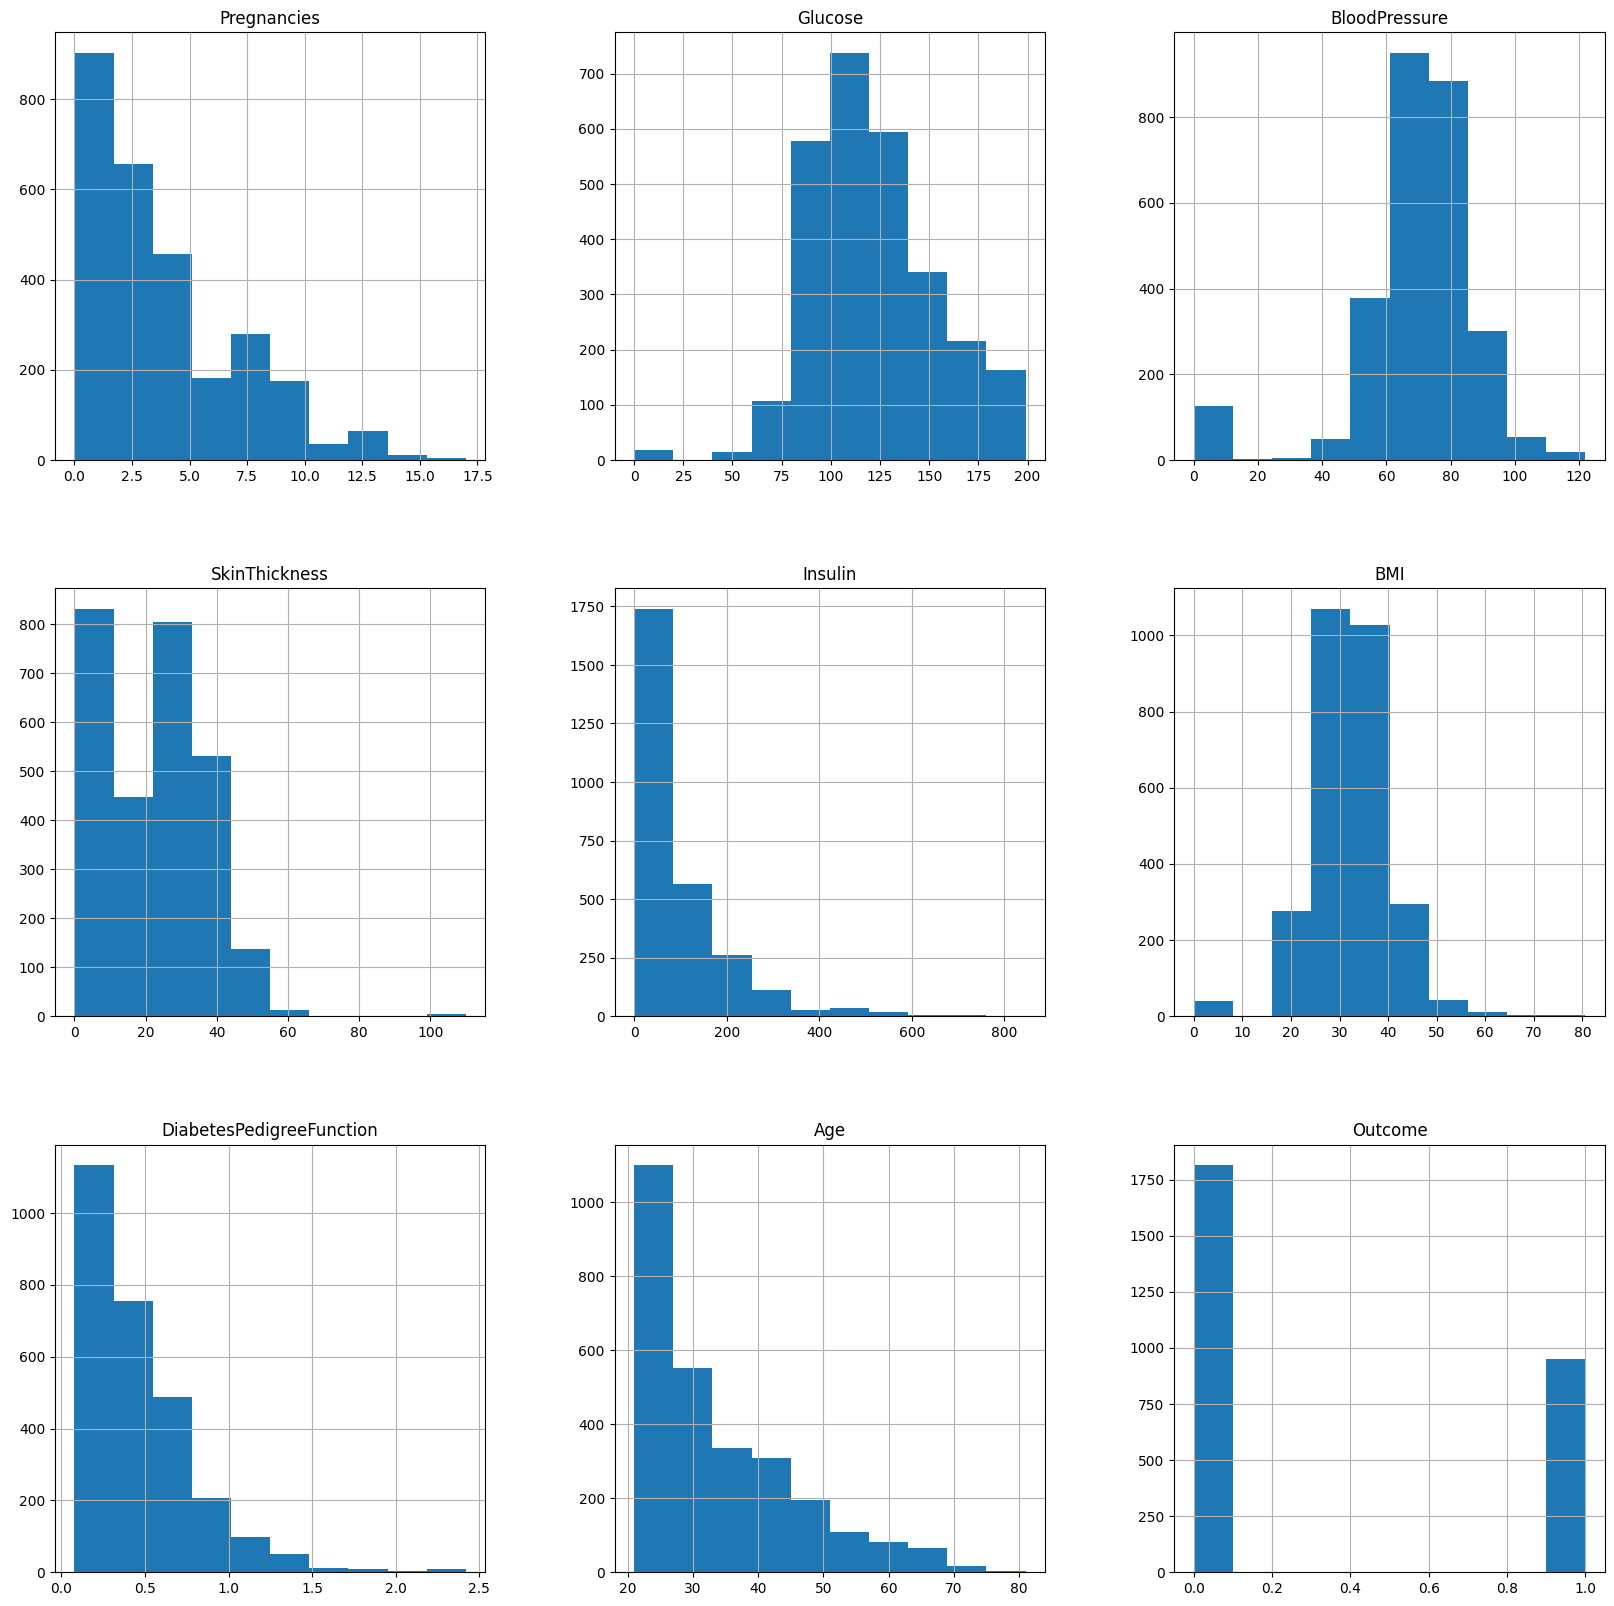

In [8]:
df.hist(figsize=(20,20))
plt.show()

In [9]:
px.imshow(df.corr(),title='Correlation Matrix',)

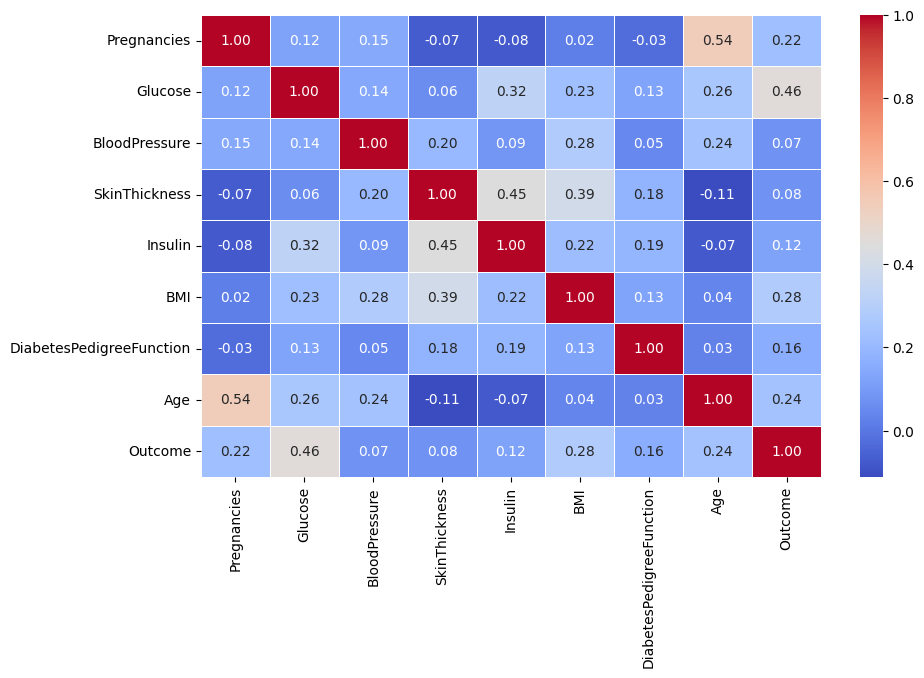

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.show()

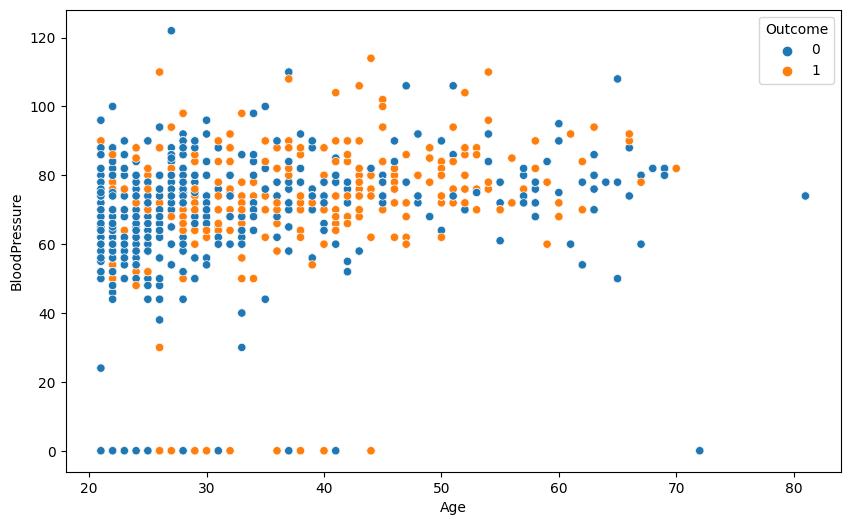

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='BloodPressure',data=df,hue='Outcome')
plt.show()


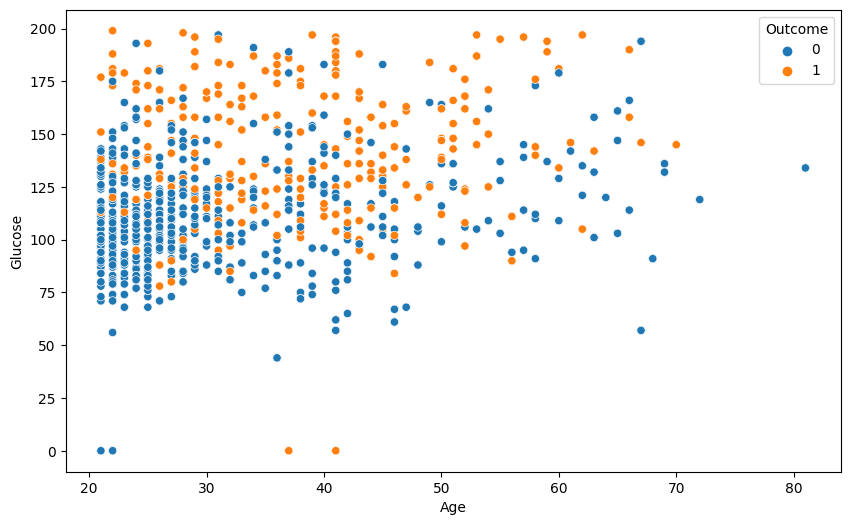

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Glucose',data=df,hue='Outcome')
plt.show()

In [13]:
df['Pregnancies'].value_counts()

Pregnancies
1     491
0     412
2     387
3     270
4     259
5     198
6     181
7     145
8     134
9      98
10     78
11     35
13     32
12     32
14      9
17      4
15      3
Name: count, dtype: int64

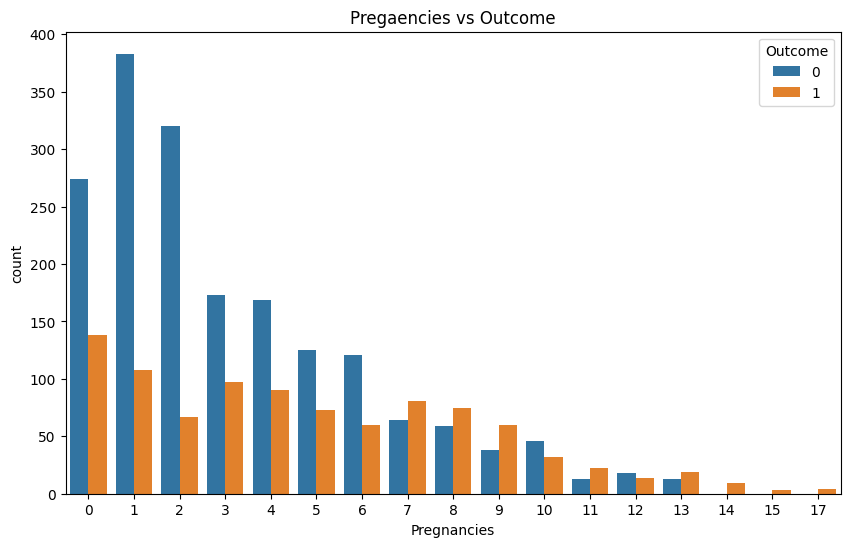

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pregnancies',data=df,hue='Outcome')
plt.title('Pregaencies vs Outcome')
plt.show()

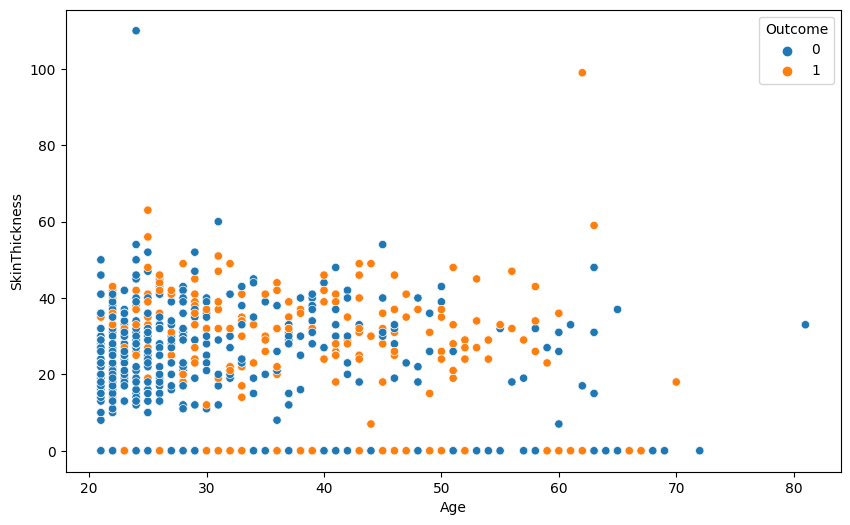

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='SkinThickness',data=df,hue='Outcome')
plt.show()

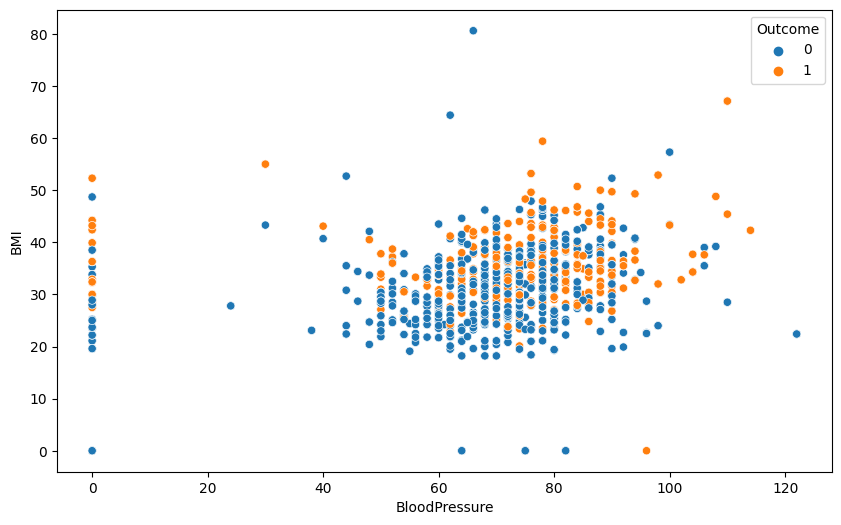

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='BloodPressure',y='BMI',data=df,hue='Outcome')
plt.show()

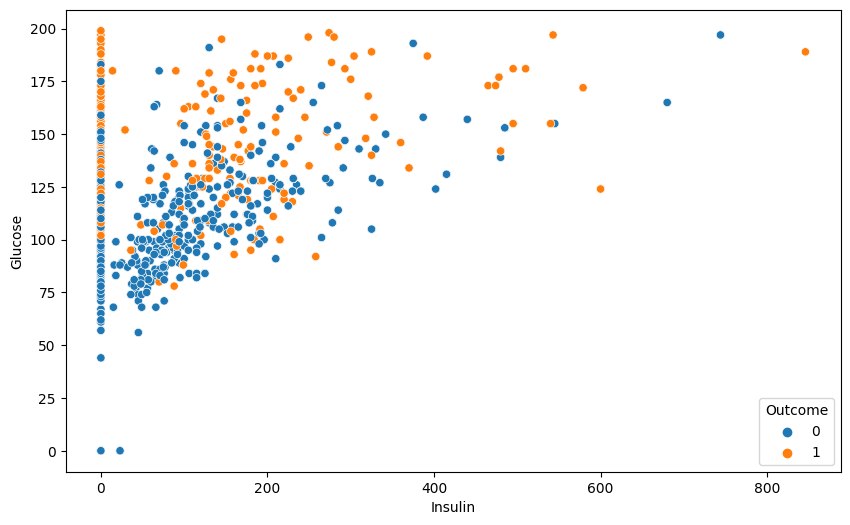

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Insulin',y='Glucose',data=df,hue='Outcome')
plt.show()

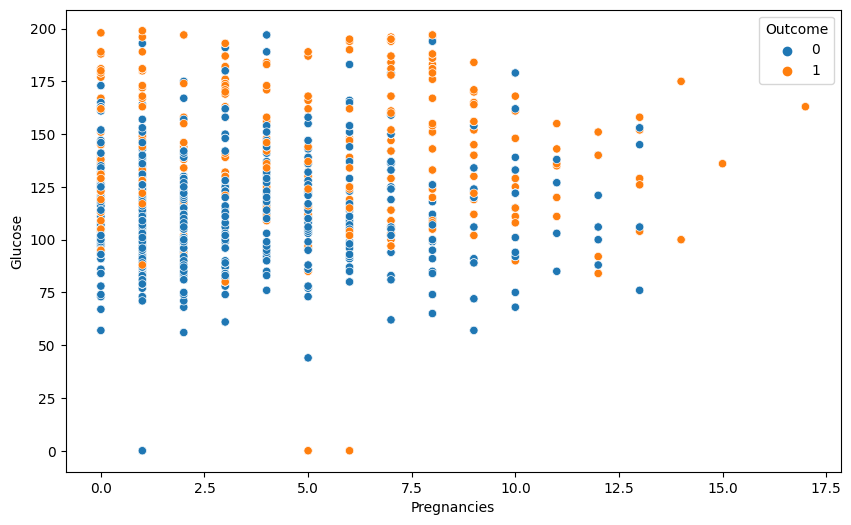

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pregnancies',y='Glucose',data=df,hue='Outcome')
plt.show()

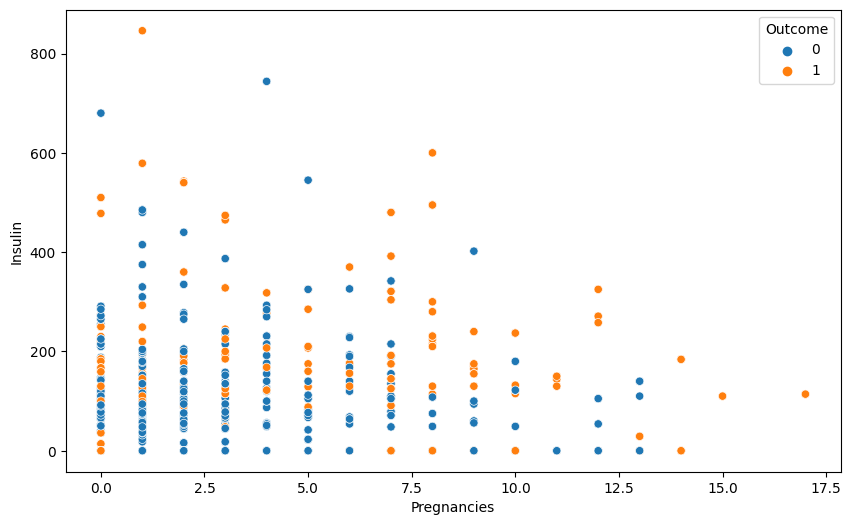

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pregnancies',y='Insulin',data=df,hue='Outcome')
plt.show()

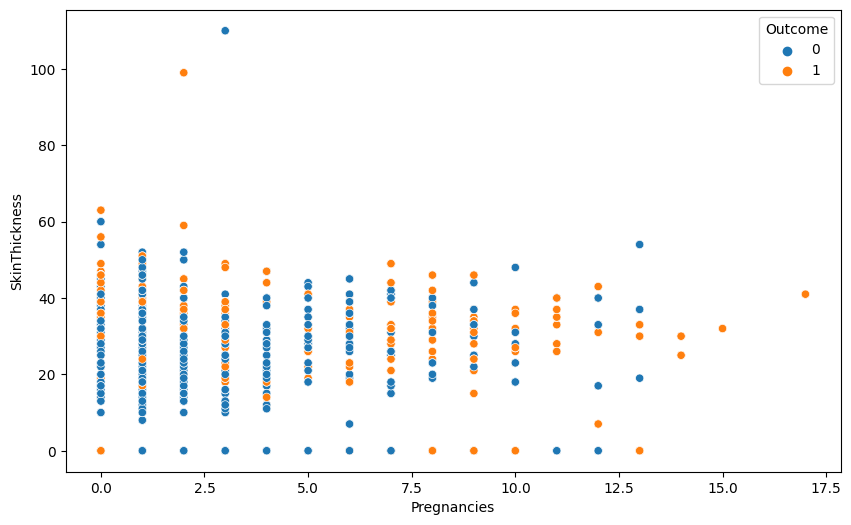

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pregnancies',y='SkinThickness',data=df,hue='Outcome')
plt.show()

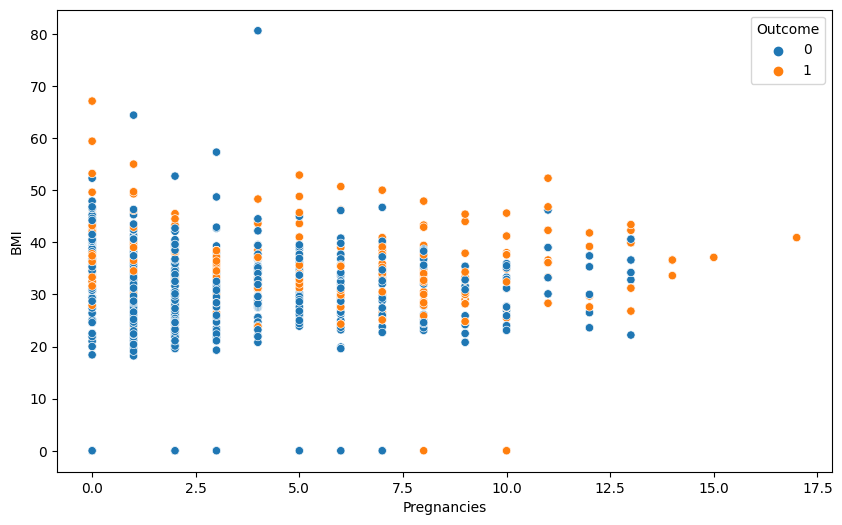

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pregnancies',y='BMI',data=df,hue='Outcome')
plt.show()

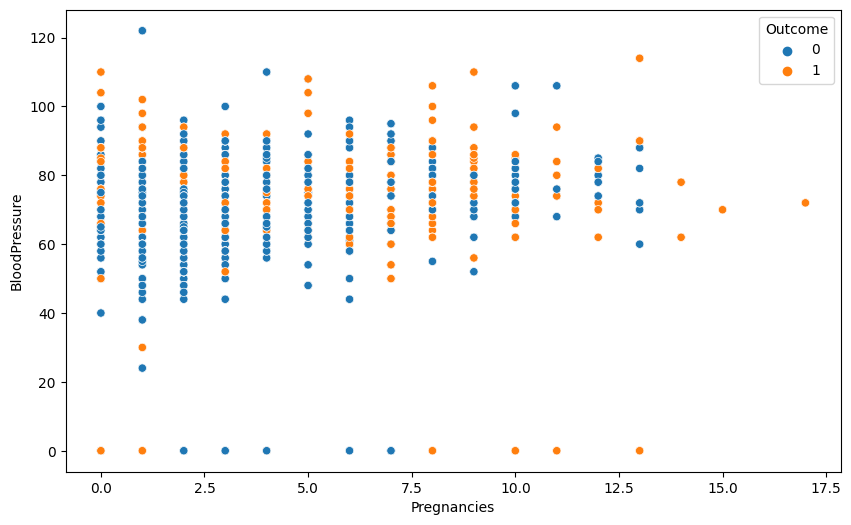

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pregnancies',y='BloodPressure',data=df,hue='Outcome')
plt.show()

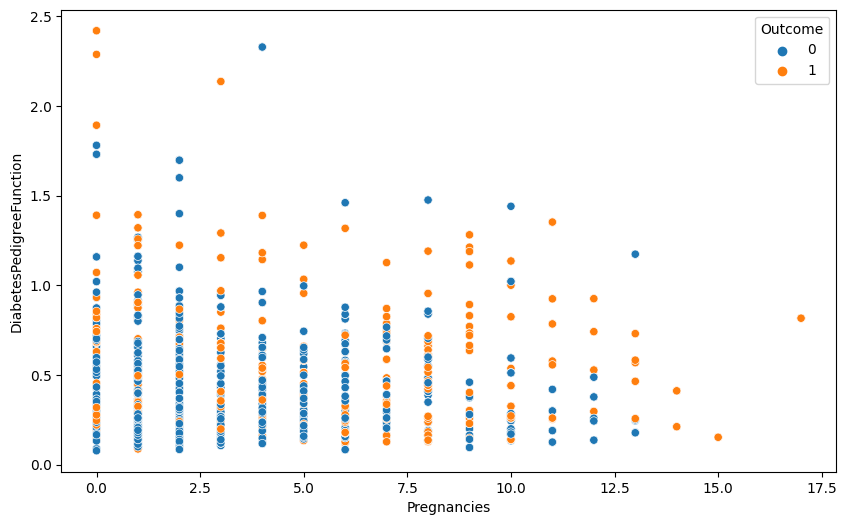

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Pregnancies',y='DiabetesPedigreeFunction',data=df,hue='Outcome')
plt.show()

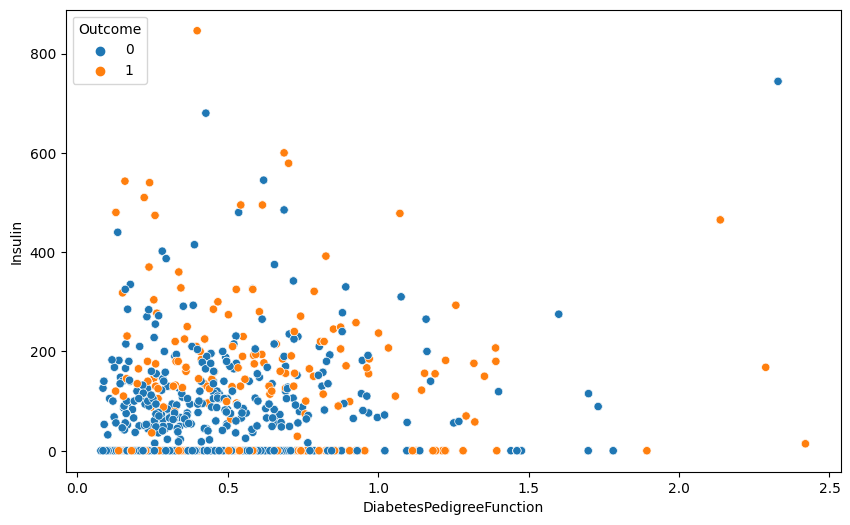

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DiabetesPedigreeFunction',y='Insulin',data=df,hue='Outcome')
plt.show()

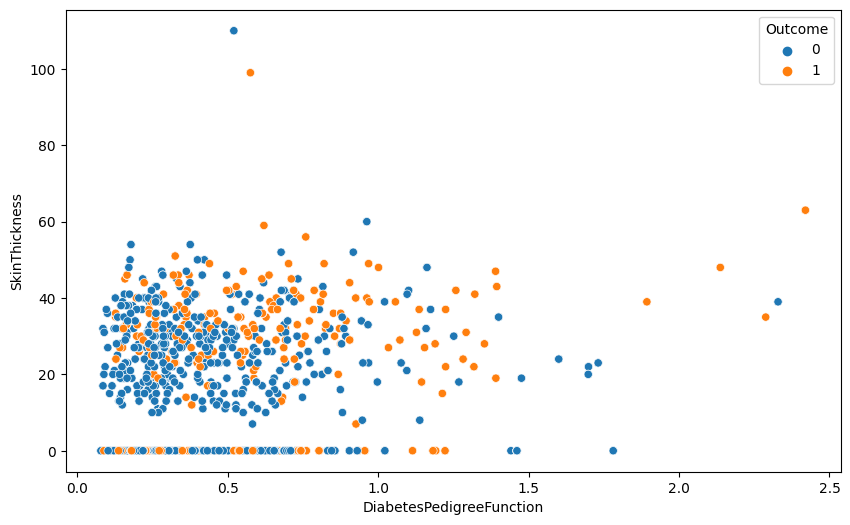

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DiabetesPedigreeFunction',y='SkinThickness',data=df,hue='Outcome')
plt.show()

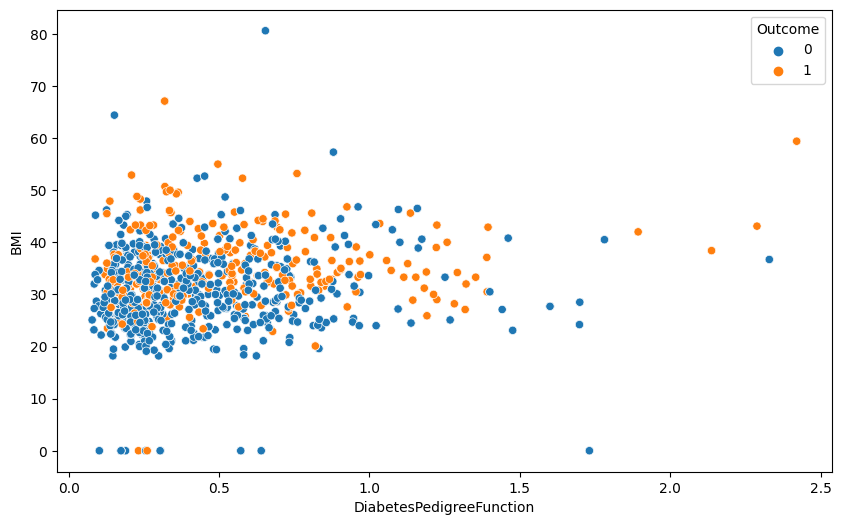

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DiabetesPedigreeFunction',y='BMI',data=df,hue='Outcome')
plt.show()

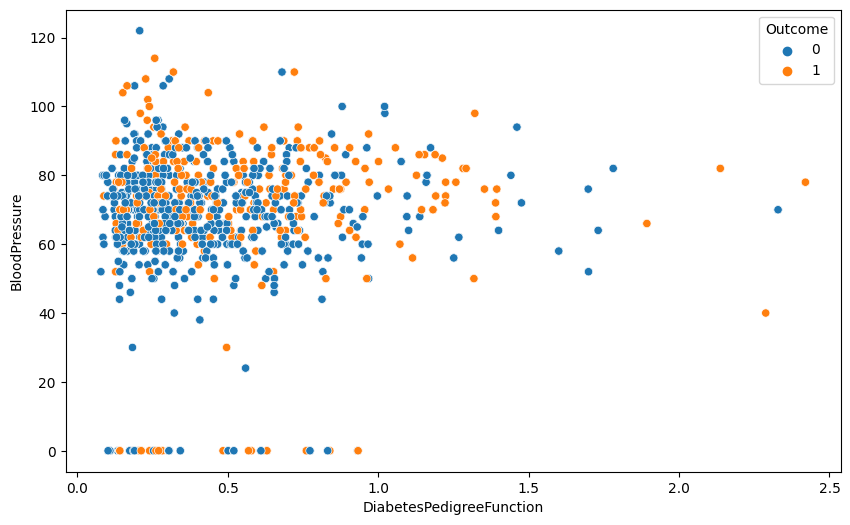

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DiabetesPedigreeFunction',y='BloodPressure',data=df,hue='Outcome')
plt.show()

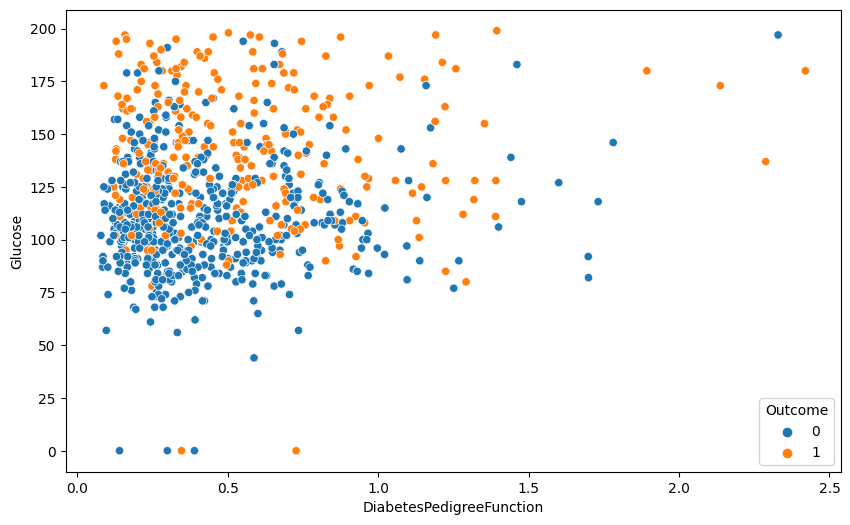

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DiabetesPedigreeFunction',y='Glucose',data=df,hue='Outcome')
plt.show()

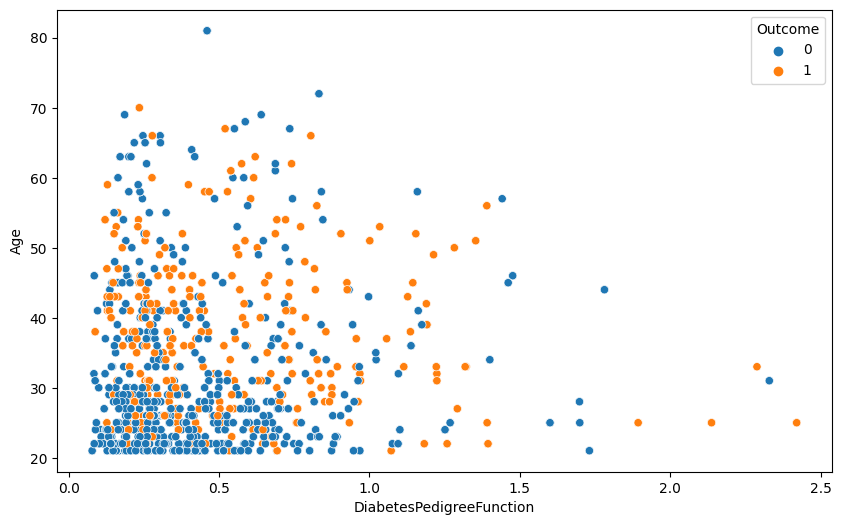

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DiabetesPedigreeFunction',y='Age',data=df,hue='Outcome')
plt.show()

As we can see there are many outliers in the data that we will have to remove to create a good machine learning model

In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is already loaded
x = df.drop(columns='Outcome')
y = df['Outcome']

# Train-test split without removing outliers
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Models and their respective accuracy after fitting
results = {}

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
results['SVM'] = svm_accuracy

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test))
results['Logistic Regression'] = logreg_accuracy

# CatBoost
catboost_model = CatBoostClassifier(silent=True)
catboost_model.fit(X_train, y_train)
catboost_accuracy = accuracy_score(y_test, catboost_model.predict(X_test))
results['CatBoost'] = catboost_accuracy

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_accuracy = accuracy_score(y_test, adaboost_model.predict(X_test))
results['AdaBoost'] = adaboost_accuracy

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
results['XGBoost'] = xgb_accuracy

# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_accuracy = accuracy_score(y_test, lgbm_model.predict(X_test))
results['LightGBM'] = lgbm_accuracy

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
results['Random Forest'] = rf_accuracy

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
results['Decision Tree'] = dt_accuracy

# Print results
print('With outliers included:')
for model, accuracy in results.items():
    print(f"{model} Accuracy: {accuracy:.4f}")


[LightGBM] [Info] Number of positive: 683, number of negative: 1254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 1937, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352607 -> initscore=-0.607599
[LightGBM] [Info] Start training from score -0.607599
With outliers included:
SVM Accuracy: 0.7702
Logistic Regression Accuracy: 0.7870
CatBoost Accuracy: 0.9627
AdaBoost Accuracy: 0.8111
XGBoost Accuracy: 0.9795
LightGBM Accuracy: 0.9675
Random Forest Accuracy: 0.9723
Decision Tree Accuracy: 0.9651


In [31]:
# Assuming df is already loaded
x = df.drop(columns='Outcome')
y = df['Outcome']

# Function to remove outliers using IQR
def remove_outliers_iqr(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from features
X_iqr = remove_outliers_iqr(x)

# Align y with the reduced X_iqr dataset
y_aligned = y[X_iqr.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_iqr, y_aligned, test_size=0.3, random_state=42)

# Models and their respective accuracy after fitting
results = {}

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
results['SVM'] = svm_accuracy

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test))
results['Logistic Regression'] = logreg_accuracy

# CatBoost
catboost_model = CatBoostClassifier(silent=True)
catboost_model.fit(X_train, y_train)
catboost_accuracy = accuracy_score(y_test, catboost_model.predict(X_test))
results['CatBoost'] = catboost_accuracy

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_accuracy = accuracy_score(y_test, adaboost_model.predict(X_test))
results['AdaBoost'] = adaboost_accuracy

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
results['XGBoost'] = xgb_accuracy

# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_accuracy = accuracy_score(y_test, lgbm_model.predict(X_test))
results['LightGBM'] = lgbm_accuracy

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
results['Random Forest'] = rf_accuracy

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
results['Decision Tree'] = dt_accuracy

# Print results
print('With outliers removed using IQR:')
for model, accuracy in results.items():
    print(f"{model} Accuracy: {accuracy:.4f}")


[LightGBM] [Info] Number of positive: 497, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 1609, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308888 -> initscore=-0.805325
[LightGBM] [Info] Start training from score -0.805325
With outliers removed using IQR:
SVM Accuracy: 0.7870
Logistic Regression Accuracy: 0.7942
CatBoost Accuracy: 0.9768
AdaBoost Accuracy: 0.8145
XGBoost Accuracy: 0.9957
LightGBM Accuracy: 0.9957
Random Forest Accuracy: 0.9986
Decision Tree Accuracy: 0.9928


As we can see the performance significantly improved after we have removed the outlier data

**Lets optimize the models with optuna**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is already loaded
x = df.drop(columns='Outcome')
y = df['Outcome']

# Function to remove outliers using IQR
def remove_outliers_iqr(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from features
X_iqr = remove_outliers_iqr(x)

# Align y with the reduced X_iqr dataset
y_aligned = y[X_iqr.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_iqr, y_aligned, test_size=0.3, random_state=42)

# Models and their respective accuracy after fitting
results = {}

# Decision Tree with given hyperparameters
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, min_samples_leaf=1)
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
results['Decision Tree'] = dt_accuracy

# LightGBM with given hyperparameters
lgbm_model = LGBMClassifier(
    learning_rate=0.09460640139323098,
    max_depth=10,
    num_leaves=44,
    feature_fraction=0.8387300083191747,
    bagging_fraction=0.9980285979164016,
    bagging_freq=8,
    min_child_samples=25
)
lgbm_model.fit(X_train, y_train)
lgbm_accuracy = accuracy_score(y_test, lgbm_model.predict(X_test))
results['LightGBM'] = lgbm_accuracy

# XGBoost with given hyperparameters
xgb_model = XGBClassifier(
    eta=0.0063302810163328,
    max_depth=9,
    subsample=0.9375990562906965,
    colsample_bytree=0.5444730300202782,
    gamma=0.041507763292139746,
    min_child_weight=0.19315954148923137,
    n_estimators=680,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
results['XGBoost'] = xgb_accuracy

# Print results
print('With outliers removed using IQR:')
for model, accuracy in results.items():
    print(f"{model} Accuracy: {accuracy:.4f}")


[LightGBM] [Warning] feature_fraction is set=0.8387300083191747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8387300083191747
[LightGBM] [Warning] bagging_fraction is set=0.9980285979164016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9980285979164016
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.8387300083191747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8387300083191747
[LightGBM] [Warning] bagging_fraction is set=0.9980285979164016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9980285979164016
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Info] Number of positive: 497, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can se

In [33]:
import optuna


# Define the objective function for Optuna
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta': trial.suggest_loguniform('eta', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.1, 10.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'random_state': 42
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters and accuracy
best_params = study.best_params
best_accuracy = study.best_value

# Train the XGBoost model with the best parameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print('Best Parameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2024-09-09 10:17:11,872] A new study created in memory with name: no-name-b9854141-6264-43d9-95dd-acb24cbf9b32
[I 2024-09-09 10:17:12,321] Trial 0 finished with value: 0.9956521739130435 and parameters: {'eta': 0.06175006661785709, 'max_depth': 10, 'subsample': 0.9302922907165184, 'colsample_bytree': 0.8118221737972235, 'gamma': 0.0027494937819172137, 'min_child_weight': 0.15367112685714504, 'n_estimators': 220}. Best is trial 0 with value: 0.9956521739130435.
[I 2024-09-09 10:17:12,799] Trial 1 finished with value: 0.8681159420289855 and parameters: {'eta': 0.006143627991887836, 'max_depth': 4, 'subsample': 0.7060691454516564, 'colsample_bytree': 0.6387752674907323, 'gamma': 0.28051061335797756, 'min_child_weight': 0.46991755027818977, 'n_estimators': 728}. Best is trial 0 with value: 0.9956521739130435.
[I 2024-09-09 10:17:13,110] Trial 2 finished with value: 0.936231884057971 and parameters: {'eta': 0.012654959423294254, 'max_depth': 9, 'subsample': 0.6577159062266809, 'colsample

Best Parameters: {'eta': 0.06175006661785709, 'max_depth': 10, 'subsample': 0.9302922907165184, 'colsample_bytree': 0.8118221737972235, 'gamma': 0.0027494937819172137, 'min_child_weight': 0.15367112685714504, 'n_estimators': 220}
Best Accuracy: 0.9956521739130435


In [34]:


# Define the objective function for Optuna
def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'random_state': 42
    }
    
    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters and accuracy
best_params = study.best_params
best_accuracy = study.best_value

# Train the DecisionTreeClassifier with the best parameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print('Best Parameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2024-09-09 10:18:17,003] A new study created in memory with name: no-name-81dc2df7-fe9f-4deb-a32e-f99e1fe6656a
[I 2024-09-09 10:18:17,021] Trial 0 finished with value: 0.9028985507246376 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9028985507246376.
[I 2024-09-09 10:18:17,034] Trial 1 finished with value: 0.7739130434782608 and parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9028985507246376.
[I 2024-09-09 10:18:17,050] Trial 2 finished with value: 0.8739130434782608 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9028985507246376.
[I 2024-09-09 10:18:17,065] Trial 3 finished with value: 0.7927536231884058 and parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with 

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1}
Best Accuracy: 0.9347826086956522
